Excersise 3 Question 1

In [71]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

Starting from the code developed at the lectrure the new operations are added to already designed options.

In [72]:
class Multiply:
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x * y
    
    def backward(self, dLdz):
        dzdx = self.y
        dLdx = dLdz * dzdx
        
        dzdy = self.x
        dLdy = dLdz * dzdy
        return [dLdx, dLdy]


class Add:
    def forward(self, x, y):
        self.x = x
        self.y = y
        return x + y
        
    def backward(self, dLdz):
        dzdy = 1
        dzdx = 1
        return [dLdz * dzdy, dLdz * dzdx]
    
class ApplySinus:
    def forward(self,x):
        self.x=x
        return np.sin(x)
    
    def backward(self,dLdz):
        dzdx= np.cos(self.x)
        return dLdz*dzdx
    
class ApplyCosinus:
    def forward(self,x):
        self.x=x
        return np.cos(x)
    
    def backward(self,dLdz):
        dzdx= -np.sin(self.x)
        return dLdz*dzdx  
    
class ApplyExp:
    def forward(self,x):
        self.x=x
        return np.exp(x)
    
    def backward(self,dLdz):
        dzdx= np.exp(self.x)
        return dLdz*dzdx  
    
    
class ApplyPower:
    def forward(self,x,y):
        self.x=x
        self.y =y
        return np.power(x,y)
    
    def backward(self,dLdz):
        dzdy= np.power(self.x,self.y)*np.log(self.x)
        dzdx= self.y*np.power(self.x,self.y-1)
        return [dLdz * dzdy, dLdz * dzdx]     
    
class ApplySquare:
    def forward(self,x):
        self.x = x
        return np.power(x,2)
    
    def backward(self, dLdz):
        dzdx = 2*self.x
        return dLdz*dzdx  
    
    

In [73]:
def f_with_gradients(x, y, z):
    q = Add()
    f = Multiply()
    
    q_out = q.forward(x, y)
    f_out = f.forward(q_out, z)
    
    grad_f = f.backward(1.)
    grad_q = q.backward(grad_f[0])

    gradients = [grad_q[0], grad_q[1], grad_f[1]]
    return f_out, gradients

New function sin(x^2) implemented: 

In [62]:
def f2_with_gradients(x):
    p = ApplySquare()
    s = ApplySinus()
    
    p_out = p.forward(x)
    s_out = s.forward(p_out)
    
    grad_s = s.backward(1.)
    grad_p = p.backward(grad_s)
    
    gradients = grad_p
    
    return [s_out, gradients]
    
    

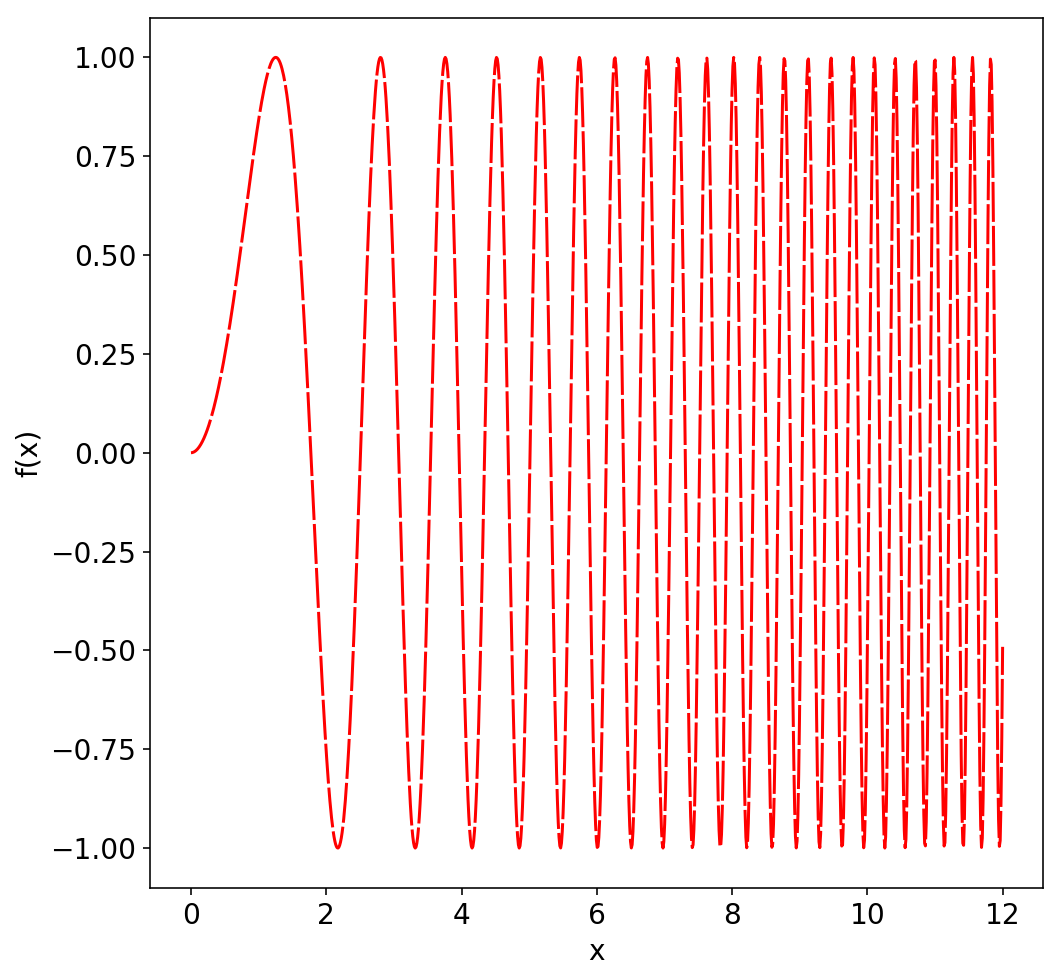

In [68]:
inputvalues = np.linspace(0,12,1000)
results = []
for i in inputvalues: results.append(f2_with_gradients(i))
value, gradient = [],[]
for i in results:
    value.append(i[0])
    gradient.append(i[1])


plt.plot(inputvalues, value, 'r--', dashes=(10,1))
plt.xlabel("x")
plt.ylabel("f(x)")


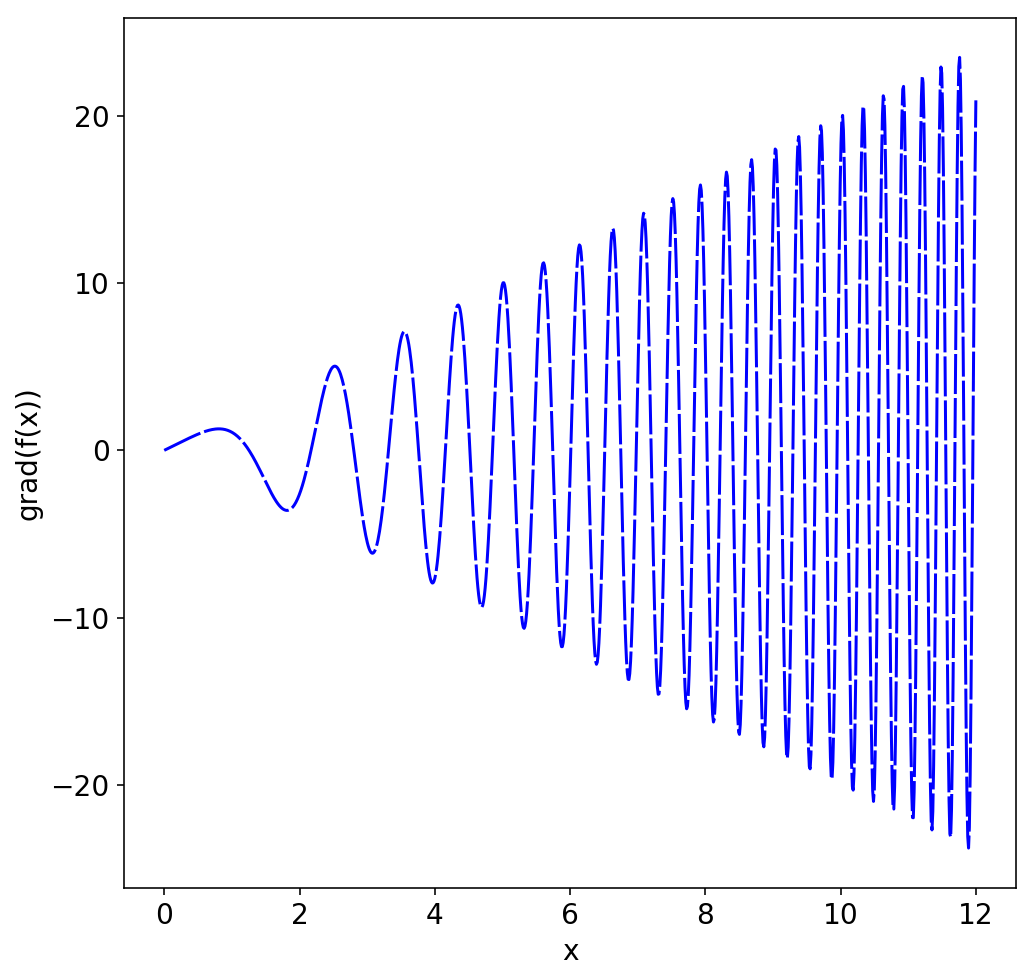

In [69]:
plt.plot(inputvalues, gradient, 'b--', dashes=(10,1))
manualgradient = []
for i in inputvalues: manualgradient.append(2*i*np.cos(i*i)) 
plt.xlabel("x")
plt.ylabel("grad(f(x))")


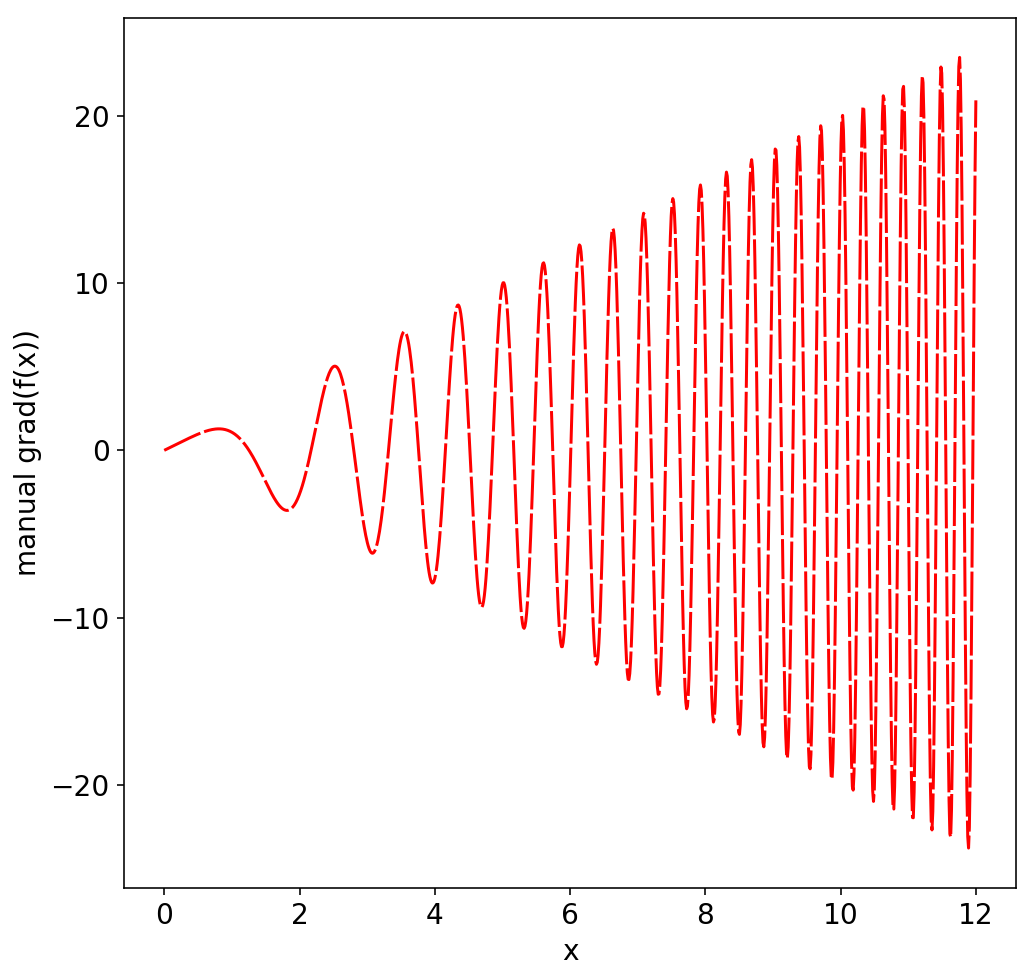

In [70]:
plt.plot(inputvalues, manualgradient, 'r--', dashes=(10,1))
plt.xlabel("x")
plt.ylabel("manual grad(f(x))")